In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
import _redshift_richness_bins as analysis

In [2]:
suff = '_partial_coverage'
data_BPZ = np.load(f'../data/stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles_BPZ = data_BPZ['stacked profile']
covariances_BPZ = data_BPZ['stacked covariance']

In [3]:
data_random_BPZ = np.load(f'../data/stacked_esd_profiles_redmapper_random_true{suff}.pkl', allow_pickle=True)
profiles_random_BPZ = data_random_BPZ['stacked profile']
covariances_random_BPZ = data_random_BPZ['stacked covariance']

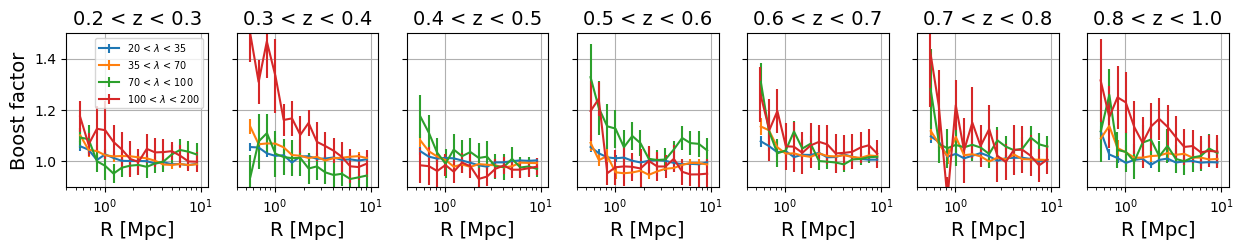

In [4]:
suff_ls = '_true'
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
fig, axs = plt.subplots(1, n_z_bin, figsize = (15,2), sharey=True)
for j, z_bin in enumerate(Z_bin):
    for i, m_bin in enumerate(Obs_bin):
        
            label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            
            mask_z = (profiles_BPZ['z_mean'] > z_bin[0])*(profiles_BPZ['z_mean'] < z_bin[1])
            mask_m = (profiles_BPZ['obs_mean'] > m_bin[0])*(profiles_BPZ['obs_mean'] < m_bin[1])
            
            mask_z_random = (profiles_random_BPZ['z_mean'] > z_bin[0])*(profiles_random_BPZ['z_mean'] < z_bin[1])
            mask_m_random = (profiles_random_BPZ['obs_mean'] > m_bin[0])*(profiles_random_BPZ['obs_mean'] < m_bin[1])
            
            up = np.mean(profiles_BPZ['W_l'+suff_ls][mask_z*mask_m][0], axis=0)
            err_up = np.std(profiles_BPZ['W_l'+suff_ls][mask_z*mask_m][0], axis=0)
            err_up = err_up/np.sqrt(len(profiles_BPZ['W_l'+suff_ls][mask_z*mask_m][0]))
            
            down = np.mean(profiles_random_BPZ['W_l'+suff_ls][mask_z_random*mask_m_random][0], axis=0)
            err_down = np.std(profiles_random_BPZ['W_l'+suff_ls][mask_z_random*mask_m_random][0], axis=0)
            err_down = err_down/np.sqrt(len(profiles_random_BPZ['W_l'+suff_ls][mask_z*mask_m][0]))
            ratio = up/down
            err_ratio2 = err_up**2/(down**2) - (up/down)**2*(err_down**2)
            x = profiles_random_BPZ['radius'][mask_z*mask_m][0]
            
            axs[j].errorbar(x, ratio, err_ratio2**.5, label = label_M)
            axs[j].set_xlim(0.4, 12)
            axs[j].set_ylim(0.9, 1.5)
            axs[j].set_xscale('log')
            axs[j].set_xlabel('R [Mpc]', fontsize = 14)
            axs[j].set_title(label_z, fontsize = 14)
            axs[j].grid(True)
            axs[0].set_ylabel('Boost factor', fontsize = 14)
            axs[0].legend(fontsize=7)
plt.savefig(f'../fig/redmapper_contamination_boost_factor.png', bbox_inches='tight', dpi=100)

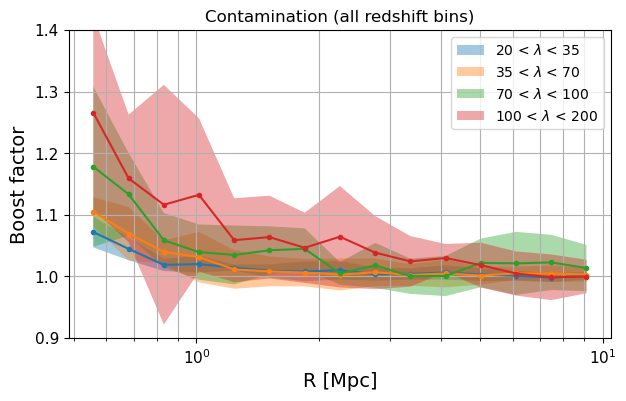

In [5]:
suff_ls = '_true'
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
plt.figure(figsize=(7,4))
for i, m_bin in enumerate(Obs_bin):
        ratio = np.zeros([len(profiles_random_BPZ['radius'][0]), n_z_bin])
        for j, z_bin in enumerate(Z_bin):
        
            label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            
            mask_z = (profiles_BPZ['z_mean'] > z_bin[0])*(profiles_BPZ['z_mean'] < z_bin[1])
            mask_m = (profiles_BPZ['obs_mean'] > m_bin[0])*(profiles_BPZ['obs_mean'] < m_bin[1])
            
            mask_z_random = (profiles_random_BPZ['z_mean'] > z_bin[0])*(profiles_random_BPZ['z_mean'] < z_bin[1])
            mask_m_random = (profiles_random_BPZ['obs_mean'] > m_bin[0])*(profiles_random_BPZ['obs_mean'] < m_bin[1])
            
            #print(len(profiles_BPZ['W_l'+suff_ls][mask_z*mask_m][0]), len(profiles_random_BPZ['W_l'+suff_ls][mask_z_random*mask_m_random][0]))
            up = np.mean(profiles_BPZ['W_l'+suff_ls][mask_z*mask_m][0], axis=0)
            down = np.mean(profiles_random_BPZ['W_l'+suff_ls][mask_z_random*mask_m_random][0], axis=0)
            ratio[:,j] = up/down
            
        plt.fill_between(profiles_random_BPZ['radius'][0], 
                         np.mean(ratio, axis=1)+ np.std(ratio, axis=1),
                         np.mean(ratio, axis=1)- np.std(ratio, axis=1),label = label_M, alpha=.4)
        
        plt.plot(profiles_random_BPZ['radius'][0], 
                         np.mean(ratio, axis=1), marker='.')

plt.ylim(0.9, 1.4)
plt.xscale('log')
plt.ylabel('Boost factor', fontsize = 14)
plt.xlabel('R [Mpc]', fontsize = 14)
plt.legend(loc='upper right')
plt.grid(True, which="both", ls="-")
plt.title('Contamination (all redshift bins)')
plt.tick_params(axis='both', which = 'both', labelsize= 11)
plt.savefig(f'../fig/redmapper_contamination_boost_factor_all_z_bins.png', bbox_inches='tight', dpi=100)